In [ ]:
import pandas as pd

In [ ]:
csv_path = '/content/drive/MyDrive/Colab Notebooks/영우_6기_자연어/수업안/dataset/news_data.csv'

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [ ]:
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0       파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1       동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2       황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3       귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4       서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
                              ...                        
5244    신종 코로나바이러스 감염증코로나 사태 이후 가정의 달 월에도 언택트비대면 신풍속도가...
5245    는 소비자로부터 월 이용료 만만원을 받고 초고속 인터넷을 제공한다 그런 브로드밴드가...
5246    머리를 긁고 있는 오랑우탄 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이 ...
5247    가 오는 일 정식 출시하는 스마트폰 벨벳이 사실상 공짜폰이 될 전망이다 단말기 가격...
5248    이미지제공게티이미지뱅크 이미지제공게티이미지뱅크  전자신문  전자신문인터넷 무단전재 ...
Name: news, Length: 5249, dtype: object

In [ ]:
# null 값이 있는지 체크
df.isnull().sum(axis = 0)

news    0
code    0
dtype: int64

In [ ]:
# 중복된 샘플 제거 (drop_duplicate활용)
df = df.drop_duplicates(subset=['news'])

# Nan 제거 (dropna)
df = df.dropna(how='any')

df.shape

(3985, 2)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

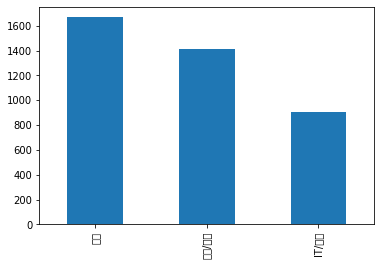

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"

df['code'].value_counts().plot(kind='bar')

In [ ]:
df.groupby('code').size().reset_index(name='count')

,code,count
0,IT/과학,903
1,사회,1668
2,생활/문화,1414


In [ ]:
df = df.replace({'code':{'IT/과학': '0', '사회':'1', '생활/문화':'2'}})

## 불용어 제거

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 55.8 MB/s 
     |████████████████████████████████| 453 kB 57.3 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 8.85 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-05-23 08:05:42--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Lo

In [ ]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [ ]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
from tensorflow import keras
from konlpy.tag import Mecab

tokenizer = Mecab()

def preprocessing(data, mecab):
    text_data = []

    for sentence in data:
        temp_data = []
        temp_data = mecab.morphs(sentence)
        temp_data = [word for word in temp_data if not word in stopwords]
        text_data.append(temp_data)

    text_data = list(map(' '.join, text_data))
    return text_data

In [ ]:
# df(df['news'])을 기준으로 불용어 제거하기.
text_data = preprocessing(df['news'], tokenizer)

# text_data 출력하기
print(text_data[0:5])

['파주 시청 사진제 공파 주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 다파 주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 다파 주 시 이미 모든 시민 경기도 파주시 재난 기본 소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재 배포', '동영상 천 물류 창고 화재 발화 지점 으로 지목 된 지하 층 에서 산소 절단기 산소 공급 호스 끊어진 채 발견 돼 경찰 폭발 가능 성 수사 고 습니다 확보 현장 감식 사진 보 면 산소 절단기 와 연결 된 산소 공급 호스 날카롭 게 절단 돼 었 습니다 전문가 산소 공급 호스 기계 적 충격 의해 절단 됐 고 실제 산소 샜 다면 폭발 일어날 다는 의견 제시 습니다 지하 층 에선 밖 도 전동 절단기 와 그라인더 불꽃 발생 시킬 작업 도구 다수 나와 경찰 집중 분석 고 습니다 경찰 또 건물 옆 에서 우레탄 혼합 해 작업 현장 으로 보내 차량 발견 해 화재 당시 우레탄 폼 발포 작업 함께 불꽃 튀 화기 작업 동시 진행 됐 는지 를 조사 고 습니다 당신 제보 됩니다 여러분 소중 제보 를 기다립니다 카카오톡 검색 해 채널 추가 전화 메일 온라인 제보 권 자 재 배포', '황범 순 의정부 시 부시장 지대 학교 의정부 캠퍼스 부속 병원 공사 현장 

## TF-IDF 모델 준비

In [ ]:
# DTM
# TF-IDF
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# train / test data set split


x_train, x_test, y_train, y_test = train_test_split(text_data, df['code'], test_size=0.3, shuffle=True, random_state=34)

print(x_train[:5])

['네이버 제공 데일리 한광 범 네이버 실시간 라이브 스트리밍 서비스 나우 를 통해 일 나우 페스트 마지막 공연 공개 한다 이날 오후 시반 부터 진행 되 마지막 공연 에선 송가 인 헨리 라비 에일리 무대 를 꾸민다 송가 인 전국 팔 도 메들리 를 포함 히트 곡 열창 예정 며 헨리 이번 공연 통해 오랜만 팬 앞 선다 라비 와 에일리 최초 로 듀엣 무대 를 선사 예정 지난 일 부터 진행 중 인 나우 페스트 발라드 트로트 힙합 다양 장르 아티스트 총출동 해 사용 자 함께 집 콕 떼 창 즐기 고 특히 이번 공연 기존 라이브 오디오 스트리밍 뿐 아니 라 라이브 동영상 인 보이 로 도 제공 돼 듣 즐거움 보 즐거움 두 배 로 선사 고 지난 일 백 지영 혁 오 인기 아티스트 출연 해 사용 자 함께 집 콕 떼 창 즐겼 사용 자 모바일 스테이지 를 즐기 방법 도 다양 일 무대 를 펼친 데이브레이크 었 놨다 공연 에서 팬 댓글 창 에서 모지 를 이용 해 손가락 어 올렸 내려놓 동작 으로 댓글 떼 창 나오 는가 면 일 공연 진행 십 센치 팬 뜨거운 반응 힘입 어 즉석 에서 앵 콜 곡 선보이 기 도 한광 범 종합 경제 정보 미디어 데 일리 재 배포', '티머니 제공 데일리 한광 범 티머니 코로나 로 늦 어 진 개학 개강 맞 아 티머니 페이 고객 혜택 대폭 강화 한다고 일 밝혔 티머니 페이 로 용돈 타자 이벤트 를 통해 중 고교 생 대학 생 티머니 페이 고객 용돈 지급 한다 다음 달 일 까지 년 생 중 티머니 페이 로 편의점 에서 결제 면 자동 응모 된다 매주 수요 일 명 추첨 해 각 만 원 총 만 원 용돈 지급 한다 또 티머니 페이 로 화목 타자 이벤트 를 통해서 매주 번 하교 교통비 를 돌려준다 다음 달 일 까지 티머니 페이 로 화요일 이나 목요일 대중교통 으로 하교 면 최대 만 원 까지 마일리지 로 교통비 를 돌려준다 티머니 페이먼 트 플랫 폼 사업 부장 인 정성재 상무 이번 행사 기존 티머니 카드 주 고객 층 인 청소년 대학생 위해 기획 됐 다며 티머니 페이 제공 서비스 와 

In [ ]:
print(len(df['code']))
print(len(x_train), len(y_train))

3985
2789 2789


In [ ]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train) # DTM 완성 

# x_train_tfidf 행렬 만들기
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [ ]:
print(x_train_tfidf.shape, len(y_train))
print(x_train_tfidf[0])
print('첫번째 훈련용 뉴스 기사의 레이블 :', y_train[0])

(2789, 31344) 2789
  (0, 31343)	0.09678517817808222
  (0, 31336)	0.07410031975625479
  (0, 31306)	0.08530303803648501
  (0, 30264)	0.18577332056379986
  (0, 29739)	0.06560452493654763
  (0, 29582)	0.027121241032447126
  (0, 29536)	0.18258105162288385
  (0, 28845)	0.04399923737899387
  (0, 28667)	0.08630731075055721
  (0, 28567)	0.204559661089445
  (0, 28201)	0.03774532496598633
  (0, 28124)	0.09288666028189993
  (0, 27992)	0.05450819949041965
  (0, 26667)	0.059497801983760916
  (0, 26514)	0.049748929406143144
  (0, 26322)	0.10617834844090478
  (0, 25365)	0.08945582684420629
  (0, 25068)	0.10617834844090478
  (0, 24939)	0.06048937632301248
  (0, 24844)	0.13027478269726755
  (0, 24843)	0.09469620829930758
  (0, 24834)	0.1637947110972387
  (0, 24826)	0.09678517817808222
  (0, 24376)	0.047790990107180666
  (0, 23894)	0.05653112696204972
  :	:
  (0, 9622)	0.09925590513705941
  (0, 9549)	0.053624062516269895
  (0, 9265)	0.09678517817808222
  (0, 8748)	0.1154848476918086
  (0, 8077)	0.2002826

In [ ]:
from sklearn.naive_bayes import MultinomialNB # 나이브 베이즈 
from sklearn import metrics

# 모델 학습 (나이브베이즈 모델)
# 나이브 베이즈 분류기 수행 (머신러닝 모델)
# x_train_tfidf : TF-IDF의 벡터, y_train : 레이블
# 머신러닝 학습 완료 : fit
clf = MultinomialNB().fit(x_train_tfidf, y_train)

In [ ]:
# tfidf_vectorizer(함수 만들기)
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)

    # fit_transform을 쓰지 않는 이유 : 단순 변환만 해야하기 때문에, 훈련이 필요없다.
    data_tfidf = tfidf_transformer.transform(data_counts)

    return data_tfidf

x_test_tfidf = tfidf_vectorizer(x_test)

## 결과확인하기

In [ ]:
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."           
], tokenizer)

In [ ]:
print(clf.predict(tfidf_vectorizer(new_sent)))

['1']


In [ ]:
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."  
], tokenizer)

In [ ]:
print(clf.predict(tfidf_vectorizer(new_sent)))

['0']


## 정확도 확인하기

In [ ]:
#x_test에 대한 모델이 predict결과를 y_pred에 결과 저장하기
# metrics.classification_report로 모델이 예측한 y_pred와 실제 정답데이터 y_test 두개의 리포트 출력하기
y_pred = clf.predict(x_test_tfidf)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81       279
           1       0.75      0.93      0.83       495
           2       0.83      0.72      0.77       422

    accuracy                           0.81      1196
   macro avg       0.84      0.79      0.80      1196
weighted avg       0.82      0.81      0.80      1196



# 2. 딥러닝(LSTM)으로 모델 설계

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from collections import Counter

In [ ]:
# 데이터 조사
print('훈련용 뉴스 기사 : {}'.format(len(x_train)))
print('테스트용 뉴스 기사 : {}'.format(len(x_test)))

num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 2789
테스트용 뉴스 기사 : 1196
카테고리 : 3


2789 2789 1196 1196
뉴스 기사의 최대 길이 : 17307
뉴스 기사의 평균 길이 : 900.3130154177124


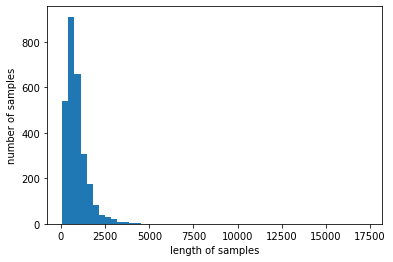

In [ ]:
print(len(x_train), len(y_train), len(x_test), len(y_test))

print('뉴스 기사의 최대 길이 : {}'.format(max(len(sample) for sample in x_train)))
print('뉴스 기사의 평균 길이 : {}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(sample) for sample in x_train], bins=50) # bins는 x의 좌표 한 칸을 50단위 설정 
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# test to sequence
def tokenize_and_remove_stopwords(data, stopwords, tokenizer):
    result = []

    for sentence in data:
        curr_data = []
        curr_data = tokenizer.morphs(sentence) # mecab 형태소 
        curr_data = [word for word in curr_data if not word in stopwords] # 불용어 제거
        result.append(curr_data)
    return result

def load_data(train_data, num_words = 10000):

    #중복 제거
    train_data.drop_duplicates(subset=['news'], inplace=True)

    # Nan 걸측치 제거
    train_data = train_data.dropna(how='any')

    # 토큰화 및 불용어 제거
    x_train = tokenize_and_remove_stopwords(train_data['news'], stopwords, tokenizer)

    #단어장 만드는 중
    words = np.concatenate(x_train).tolist()
    counter = Counter(words) ## dictionary자료형에 있는 words의 개수를 확인 
    counter = counter.most_common(10000-4) # 4개를 빼는 이유는 '<PAD>','<BOS>', '<UNK>', '<UNUSED>' 토큰때문이다.
    vocab = ['<PAD>','<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]

    x_train = list(map(wordlist_to_indexlist, x_train))

    return x_train, np.array(list(train_data['code'])), word_to_index

x_data, y_data, word_to_index = load_data(df)

In [ ]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [ ]:
max_len = 900

# sequence에 pad 채우기
# x_data = pad_sequences(x_data, maxlen=max_len)
x_data = pad_sequences(x_data, value = word_to_index['<PAD>'], padding = 'pre', maxlen = max_len)

# one hot encoding으로 변환시켜준다.
y_data = to_categorical(y_data)

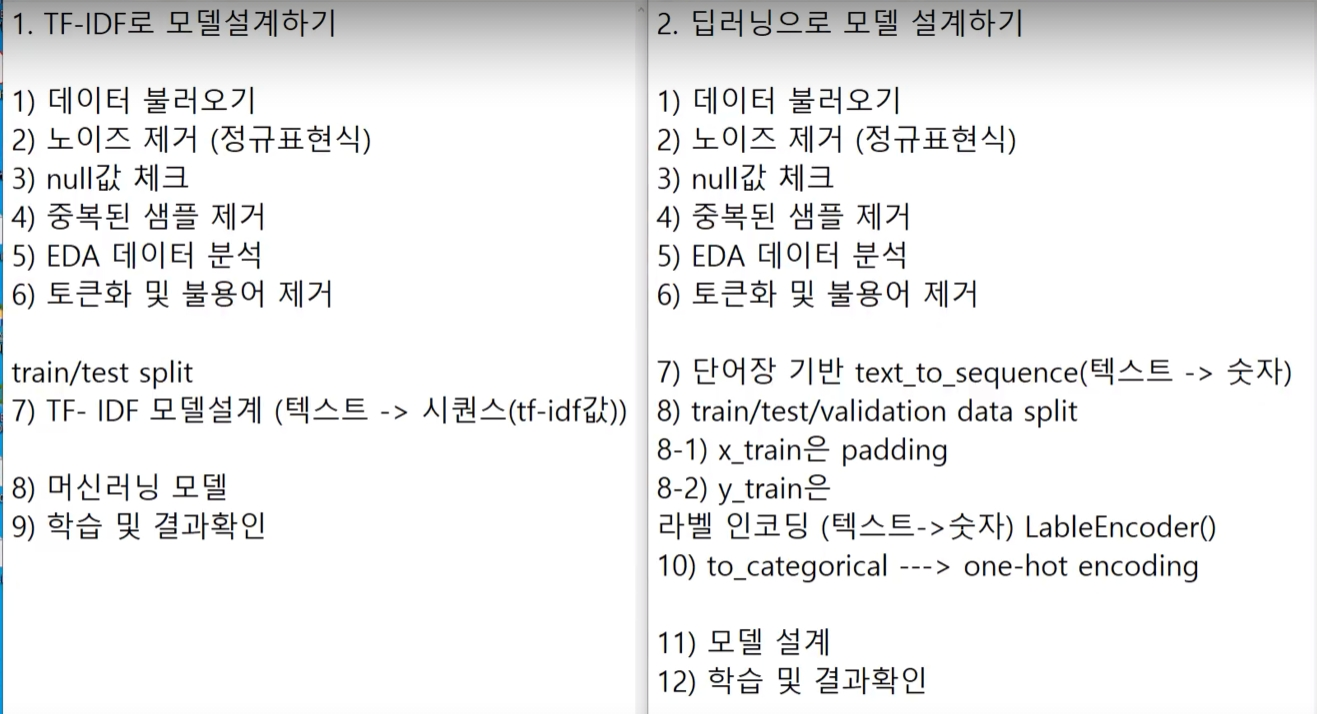

In [ ]:
target = df['code']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, stratify=target)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(3188, 900)
(3188, 3)


In [ ]:
vocab_size = 10000
embedding_dim = 128
hidden_units = 128
num_classes = 3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

# model = keras.Sequential(name = 'LSTM_custom')
# model.add(Embedding(vocab_size, emdedding_dim))
# model.add(keras.layers.LSTM(20, return_sequences=True))
# model.add(keras.layers.TimeDistributed(keras.layers.Dense(hidden_units)))
# model.add(keras.layers.LSTM(32, return_sequences = True))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Dense(16, activation='relu'))
# model.add(keras.layers.LSTM(16, return_sequences = True))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.LSTM(16, return_sequences = True))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Dense(num_classes, activation='softmax'))
# model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dense_10 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1,411,971
Trainable params: 1,411,971
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  설정한 epoch동안 val_loss가 개선되지 않을 때 조기 종료, 
# patience = 4 : 4번 동안 val_loss가 개선되지 않으면 종료한다는 의미
es = EarlyStopping(monitor='val_loss', mode='min', verbose =1, patience=4)

# 중요한 시점에서 val_loss기준 가장 좋은 모델을 파일로 저장
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', model='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(loss='categorical_crossentropy', 
                  optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# runtime type은 GPU로 설정할 것
# 어째서 에러가 날까? input과 output은 shape는 맞췄는데, 
# 뜬금없이   ValueError: Shapes (None, 3) and (None, 900, 3) are incompatible
history = model.fit(x_train, y_train, batch_size = 128, epochs = 20, callbacks=[es, mc], validation_data =(x_test, y_test))

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9627
Epoch 1: val_loss improved from 0.49166 to 0.47393, saving model to best_model.h5
25/25 [==============================] - 109s 4s/step - loss: 0.1266 - accuracy: 0.9627 - val_loss: 0.4739 - val_accuracy: 0.8444
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.0736 - accuracy: 0.9774
Epoch 2: val_loss did not improve from 0.47393
25/25 [==============================] - 103s 4s/step - loss: 0.0736 - accuracy: 0.9774 - val_loss: 0.5356 - val_accuracy: 0.8294
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9878
Epoch 3: val_loss did not improve from 0.47393
25/25 [==============================] - 105s 4s/step - loss: 0.0493 - accuracy: 0.9878 - val_loss: 0.5870 - val_accuracy: 0.8432
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9928
Epoch 4: val_loss did not improve from 0.47393
25/25 [====

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도 : %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

In [ ]:
epochs = range(1, len(history.history['acc'])+1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()